In [0]:
!pip3 install -U scikit-fuzzy

    100% |████████████████████████████████| 1.0MB 21.2MB/s 
  Stored in directory: /root/.cache/pip/wheels/81/d9/eb/b8321c08339f51be3e991e7ae45b9673270cb8ca8271482ab1
Successfully built scikit-fuzzy


In [0]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl

In [0]:
# Generate membership functions ....
food = ctrl.Antecedent(np.arange(11),'food')
service = ctrl.Antecedent(np.arange(11),'service')
tip = ctrl.Consequent(np.arange(26),'tip')

# Here food, service and tip are basically fuzzy variables which can be described by certain linguistic terms like 'low','medium','high'.


In [0]:
print(type(food))
print(type(food.universe))
print(type(food.label))

<class 'skfuzzy.control.antecedent_consequent.Antecedent'>
<class 'numpy.ndarray'>
<class 'str'>


In [0]:
# Way to define the membership functions corresponding each linguistic terms which define 'food' fuzzy variable.
food['poor'] = fuzz.trimf(food.universe , [0,0,5])
food['average'] = fuzz.trimf(food.universe , [0,5,10])
food['good'] = fuzz.trimf(food.universe , [5,10,10])


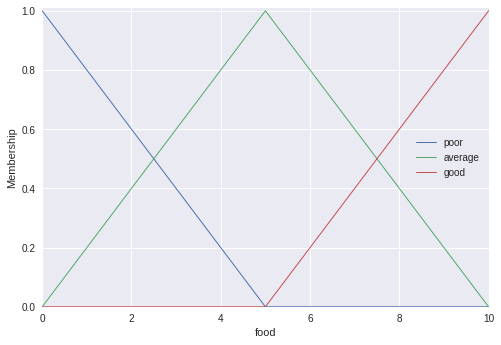

In [0]:
food.view()

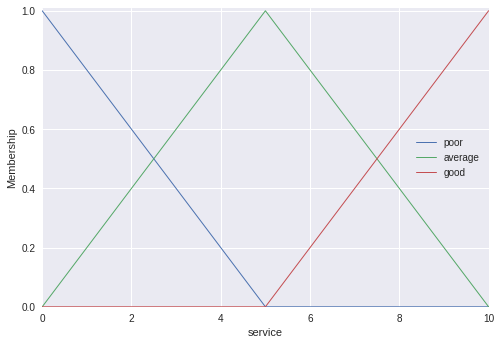

In [0]:
service.automf(3)
service.view()

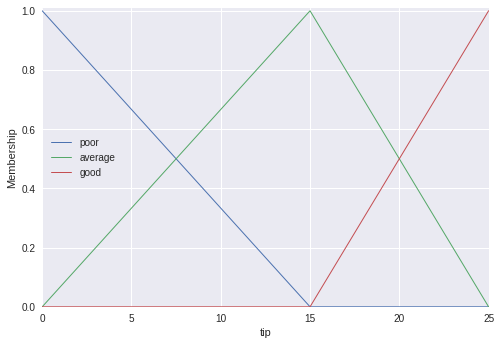

In [0]:
tip['poor'] = fuzz.trimf(tip.universe , [0,0,15])
tip['average'] = fuzz.trimf(tip.universe , [0,15,25])
tip['good'] = fuzz.trimf(tip.universe , [15,25,25])
tip.view()

In [0]:
# All our membership functions are ready. Now we need to take some crisp value for 'food' and 'service'.
# Use FLC(Fuzzy Logic Controller), that will give us a crisp value for 'tip' to be given using a Rule Base and Defuzzification module.


In [0]:
'''
    If the food is poor OR the service is poor, then the tip will be low.
    If the service is average, then the tip will be medium.
    If the food is good OR the service is good, then the tip will be high.
'''
    # This is the rule base to be used.


'\n    If the food is poor OR the service is poor, then the tip will be low.\n    If the service is average, then the tip will be medium.\n    If the food is good OR the service is good, then the tip will be high.\n'

In [0]:
rule1 = ctrl.Rule(food['poor']|service['poor'], tip['poor'])
rule2 = ctrl.Rule(service['average'], tip['average'])
rule3 = ctrl.Rule(food['good']|service['good'], tip['good'])


In [0]:
print(type(rule1))

<class 'skfuzzy.control.rule.Rule'>


(<Figure size 576x396 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7faaa88529e8>)

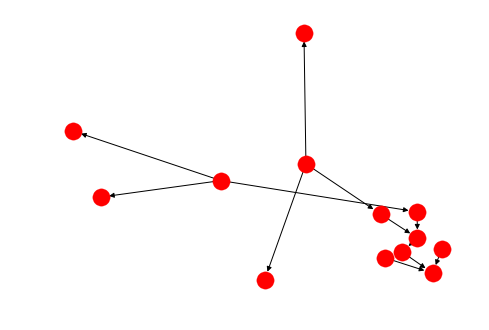

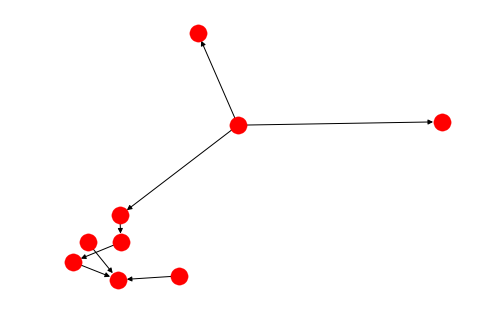

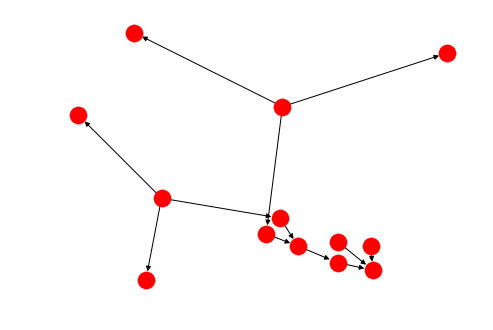

In [0]:
rule1.view()
rule2.view()
rule3.view()

In [0]:
tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3])

In [0]:
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
# We will use functions on this 'tipping' object to get the outputs.....

In [0]:
tipping.input['service'] = 9.8
tipping.input['food'] = 8

In [0]:
tipping.compute()

In [0]:
tipping.output['tip']

20.167619047619052

In [0]:
tipping.input['food'] = 5
tipping.input['service'] = 8
tipping.compute()
tipping.output['tip']

14.802721088435373